# Simple Linear Regresion

In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from statsmodels.stats.outliers_influence import OLSInfluence
import statsmodels.formula.api as smf

In [2]:
text = "@laurenboebert Inflation is down by 6.5% https://t.co/pxUujOYbJr @SpeakerMcCarthy @GOP @RepMTG https://t.co/e4d12ZfyEJ #chrag"

In [3]:
new = []

for i in text.split(' '):
    if i.__contains__('#') or i.__contains__('@') or i.__contains__('https'):
        continue
    else: new.append(i)

print(" ".join(new))

Inflation is down by 6.5%


In [4]:
df = pd.read_csv('Data\LungDisease.csv')
df.head()

,PEFR,Exposure
0,390,0
1,410,0
2,430,0
3,460,0
4,420,1


In [5]:
y = df.PEFR
X = sm.add_constant(df.Exposure)

In [6]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=47,test_size=.4,)

In [7]:
model = sm.OLS(y_train,x_train).fit()

In [8]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PEFR   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     11.17
Date:                Thu, 02 Mar 2023   Prob (F-statistic):            0.00133
Time:                        22:17:10   Log-Likelihood:                -440.72
No. Observations:                  73   AIC:                             885.4
Df Residuals:                      71   BIC:                             890.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        453.7845     30.038     15.107      0.000     393.889     513.680
Exposure      -6.2652      1.874     -3.342      0.001     -10.003      -2.528
==============================================================================
Omnibus:                        1.276   Durbin-Watson:                   2.168
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                1.082
Skew:                           0.074   Prob(JB):                        0.582
Kurtosis:                       2.422   Cond. No.                         40.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
skmodel = LinearRegression()
skmodel.fit(x_train,y_train)

print(skmodel.coef_)

[ 0.         -6.26517508]


In [10]:
smpredict = model.predict(x_test)
skpredict = skmodel.predict(x_test)

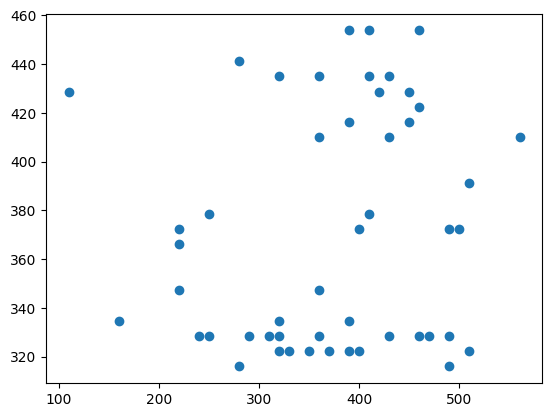

In [11]:
plt.scatter(x= y_test,y=smpredict)
# sns.scatterplot(x=y_test,y=skpredict)

In [12]:
residuals = y_test-skpredict
print(residuals)

75     -14.746162
0      -63.784489
91     -38.480987
102    161.519013
3        6.215511
94      -8.480987
109     47.784188
96      31.519013
106     -2.215812
5     -161.254139
99     101.519013
108     27.784188
10      -4.988964
107      7.784188
78      55.253838
40    -152.337213
18      21.276211
47     127.662787
86     -88.480987
30      20.071737
11     -24.988964
69    -174.746162
14    -318.723789
100    131.519013
44      27.662787
111     77.784188
1      -43.784489
22     -26.193438
49    -146.072038
60    -127.276512
88     -78.480987
38    -128.602388
112    187.784188
37     118.867262
17      -8.723789
39      31.397612
93     -18.480987
114    -35.950637
13    -114.988964
20      37.541387
101    141.519013
110     67.784188
29     -49.928263
62      12.723488
32     150.071737
46     117.662787
12     -74.988964
24      33.806562
118    174.049363
Name: PEFR, dtype: float64


# Multiple Linear Regression

In [2]:
hp = pd.read_csv("Data/house_sales.csv",sep='\t')
hp.head()

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
1,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,9373,...,3.00,6,7,1991,0,0,70000,229000,98002,False
2,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,20156,...,3.75,4,10,2005,0,0,203000,590000,98166,True
3,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,26036,...,1.75,4,8,1947,0,0,183000,275000,98166,False
4,2008-02-25,425000,2800016,Single Family,2008-02-01,418400,0.961397,442065.0,1,8618,...,3.75,5,7,1966,0,0,104000,229000,98168,False
5,2013-03-29,240000,2800024,Single Family,2013-03-01,351600,0.807904,297065.0,1,8620,...,1.75,4,7,1948,0,0,104000,205000,98168,False


In [3]:
hp['Year'] = [int(date.split('-')[0]) for date in hp.DocumentDate]
hp['Weight'] = hp.Year - 2005

In [18]:
hp.columns

Index(['DocumentDate', 'SalePrice', 'PropertyID', 'PropertyType', 'ym',
       'zhvi_px', 'zhvi_idx', 'AdjSalePrice', 'NbrLivingUnits', 'SqFtLot',
       'SqFtTotLiving', 'SqFtFinBasement', 'Bathrooms', 'Bedrooms',
       'BldgGrade', 'YrBuilt', 'YrRenovated', 'TrafficNoise', 'LandVal',
       'ImpsVal', 'ZipCode', 'NewConstruction'],
      dtype='object')

In [49]:
x1 = hp[['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']]
y1 = hp['AdjSalePrice']

In [50]:
x1train,x1test,y1train,y1test = train_test_split(x1,y1,random_state=47,test_size=.4)
hpmodel = LinearRegression()
hpmodel.fit(x1train,y1train)

LinearRegression()

In [51]:
print(hpmodel.coef_)
print(hpmodel.intercept_)

[ 2.39192337e+02 -1.79522775e-01 -1.99975220e+04 -4.99041672e+04
  1.01655962e+05]
-498356.52250214363


In [52]:
hpreictions = hpmodel.predict(x1test)
RMSE = np.sqrt(mean_squared_error(y1test,hpreictions))
R2 = r2_score(y1test,hpreictions)

print('RMSE: ',RMSE)
print('R-Square: ',R2)

RMSE:  252054.0427446027
R-Square:  0.5458266109161911


#### Weighted Regresssion

In [53]:
hp_wt_model = LinearRegression()
hp_wt_model.fit(x1train,y1train,sample_weight=hp.Weight[:13612])

LinearRegression()

In [54]:
## RSME and R2

hpreictionswt = hp_wt_model.predict(x1test)
RMSE = np.sqrt(mean_squared_error(y1test,hpreictionswt))
R2 = r2_score(y1test,hpreictionswt)

print('RMSE: ',RMSE)
print('R-Square: ',R2)

RMSE:  252290.0646787562
R-Square:  0.5449756420612935


In [3]:
hp.PropertyType

1            Multiplex
2        Single Family
3        Single Family
4        Single Family
5        Single Family
             ...      
27057    Single Family
27058    Single Family
27061    Single Family
27062    Single Family
27063    Single Family
Name: PropertyType, Length: 22687, dtype: object

# ## Categorical variables

In [8]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms','ZipGroup',
'BldgGrade', 'PropertyType']

X = pd.get_dummies(hp[predictors], drop_first=True)
Y = hp['AdjSalePrice']
hp_cat_model = LinearRegression()

Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,random_state=2,test_size=.4)


hp_cat_model.fit(Xtrain,Ytrain)

LinearRegression()

In [116]:
hp_cat_model.coef_

array([ 2.17012617e+02,  4.27766240e-01,  4.43186879e+03, -4.33439872e+04,
        9.67025005e+04,  5.64517047e+04,  1.15825983e+05,  1.79854369e+05,
        3.28875218e+05,  2.81232000e+04, -7.48806585e+04])

In [117]:
for name, coef in zip(hp[predictors].columns,hp_cat_model.coef_):
    print("Column:---> {0}, Coef:---> {1}".format(name,coef))

Column:---> SqFtTotLiving, Coef:---> 217.01261694881484
Column:---> SqFtLot, Coef:---> 0.42776623992444485
Column:---> Bathrooms, Coef:---> 4431.8687855393755
Column:---> Bedrooms, Coef:---> -43343.98715655579
Column:---> ZipGroup, Coef:---> 96702.50046502586
Column:---> BldgGrade, Coef:---> 56451.7047418585
Column:---> PropertyType, Coef:---> 115825.98302720216


In [114]:
# Categorizing the ZipCodes using median residuals

#dataframe
zip_grps = pd.DataFrame({
    'ZipCode': hp.ZipCode,
    'residuals': Y - hp_cat_model.predict(X)
}).reset_index(drop=True)

#calculating median residuals and Count for each zipcodes
zip_grps['Median Residual'] = zip_grps.groupby('ZipCode')['residuals'].transform('median')
zip_grps['Count'] = zip_grps.groupby('ZipCode')['residuals'].transform('count')

#sorting the dataframe by median residuals
zipgrps=zip_grps.drop('residuals',axis=1).drop_duplicates(subset=['ZipCode']).sort_values('Median Residual')

#calculating the count of zipcodes of the sorted dataframe
zipgrps['cum_sum'] = np.cumsum(zipgrps['Count'])

#quantile cuts
zipgrps['ZipGroup'] = pd.qcut(zipgrps['cum_sum'],5,labels=False,retbins=False)

#joining it back to the dataframe
to_join = zipgrps[['ZipCode', 'ZipGroup']].set_index('ZipCode')
hp = hp.join(to_join, on='ZipCode')
hp['ZipGroup'] = hp.ZipGroup.astype('category')

### Regression Diagnostics

In [26]:
#Stats Model version of  fitting

rpreds = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
routs = ['AdjSalePrice']

outliermodel = sm.OLS(hp[hp['ZipCode']==98105][routs],hp[hp['ZipCode']==98105][rpreds].assign(const=1)).fit()

In [5]:
# OLS influence to analyze residuals

influence = OLSInfluence(outliermodel)
standardized_residuals = influence.resid_studentized_internal
standardized_residuals.idxmin(),standardized_residuals.min()


(24333, -4.326731804078559)

In [6]:
outlier = hp[hp['ZipCode']==98105].loc[standardized_residuals.idxmin(),:]

In [20]:
outlier

DocumentDate          2008-12-23
SalePrice                 105000
PropertyID            8819900340
PropertyType       Single Family
ym                    2008-12-01
zhvi_px                   381600
zhvi_idx                0.876838
AdjSalePrice            119748.0
NbrLivingUnits                 1
SqFtLot                     7276
SqFtTotLiving               2900
SqFtFinBasement              320
Bathrooms                    3.0
Bedrooms                       6
BldgGrade                      7
YrBuilt                     1921
YrRenovated                 1960
TrafficNoise                   0
LandVal                   464000
ImpsVal                   284000
ZipCode                    98105
NewConstruction            False
Year                        2008
Weight                         3
Name: 24333, dtype: object

In [40]:
hp.loc[(hp['ZipCode']==98105)&(hp['SqFtTotLiving'] > 2899)].head()

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction,Year,Weight
1036,2007-08-16,825000,394500005,Multiplex,2007-08-01,434600,0.998621,826139.0,2,7245,...,8,1961,0,2,280000,468000,98105,False,2007,2
1783,2008-05-28,1260000,723000114,Single Family,2008-05-01,407400,0.936121,1345979.0,1,8510,...,9,1971,0,0,593000,894000,98105,False,2008,3
1785,2008-04-16,1425000,723000275,Single Family,2008-04-01,411700,0.946002,1506340.0,1,4500,...,9,1931,1995,0,388000,883000,98105,False,2008,3
2583,2007-04-30,1299960,1025049167,Single Family,2007-04-01,430900,0.990119,1312932.0,1,5461,...,9,2007,0,0,304000,1023000,98105,False,2007,2
2584,2006-08-10,1100000,1025049174,Single Family,2006-08-01,411100,0.944623,1164486.0,1,7535,...,9,2006,0,0,373000,900000,98105,True,2006,1


Text(0, 0.5, 'studentized residuals')

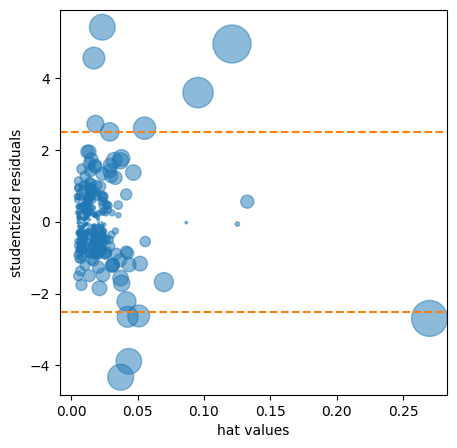

In [7]:
# Cooks Distance leverage of influence value
fig, ax = plt.subplots(figsize=(5, 5))
ax.axhline(-2.5, linestyle='--', color='C1')
ax.axhline(2.5, linestyle='--', color='C1')
ax.scatter(influence.hat_matrix_diag, influence.resid_studentized_internal,
s=1000 * np.sqrt(influence.cooks_distance[0]),
alpha=0.5)
ax.set_xlabel('hat values')
ax.set_ylabel('studentized residuals')


<AxesSubplot: >

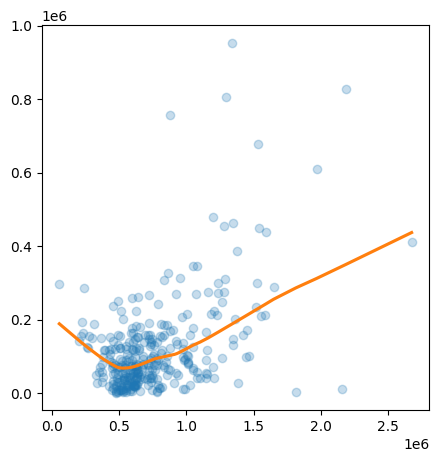

In [14]:
fig,ax = plt.subplots(figsize=(5,5))
sns.regplot(x=outliermodel.fittedvalues,y=np.abs(outliermodel.resid),scatter_kws={'alpha':0.25},
            line_kws={'color':'C1'},lowess=True,ax=ax)

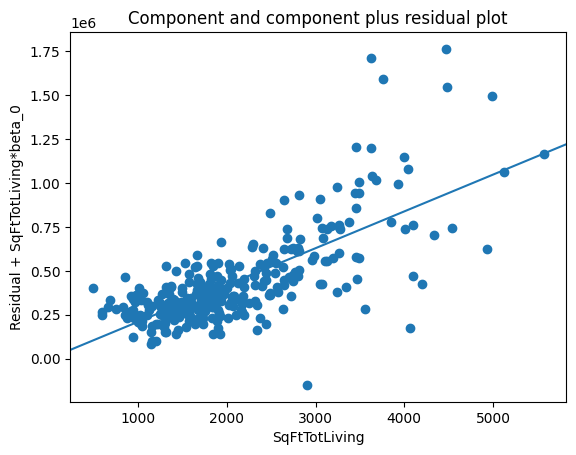

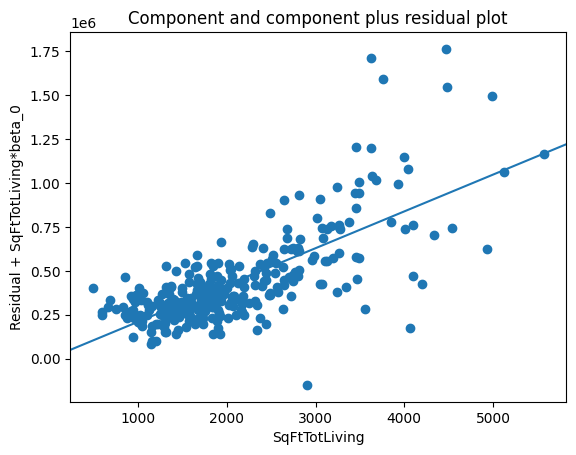

In [39]:
## Partial residual plots
sm.graphics.plot_ccpr(outliermodel,'SqFtTotLiving')

In [48]:
poly_model = smf.ols(formula = 'AdjSalePrice ~ SqFtTotLiving +'+'I(SqFtTotLiving**2)+'+ 
                     'SqFtLot + Bathrooms + Bedrooms + BldgGrade', data=hp.loc[hp['ZipCode']==98105]).fit()

In [49]:
poly_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     211.6
Date:                Mon, 06 Mar 2023   Prob (F-statistic):          9.95e-106
Time:                        01:38:38   Log-Likelihood:                -4217.9
No. Observations:                 313   AIC:                             8450.
Df Residuals:                     306   BIC:                             8476.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -6.159e+05   1.03e+05     -5.953      0.000   -8.19e+05   -4.12e+05
SqFtTotLiving             7.4521     55.418      0.134      0.893    -101.597     116.501
I(SqFtTotLiving ** 2)     0.0388      0.010      4.040      0.000       0.020       0.058
SqFtLot                  32.5594      5.436      5.990      0.000      21.863      43.256
Bathrooms             -1435.1231   1.95e+04     -0.074      0.941   -3.99e+04     3.7e+04
Bedrooms              -9191.9441   1.33e+04     -0.693      0.489   -3.53e+04    1.69e+04
BldgGrade              1.357e+05   1.49e+04      9.087      0.000    1.06e+05    1.65e+05
==============================================================================
Omnibus:                       75.161   Durbin-Watson:                   1.625
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              637.978
Skew:                           0.699   Prob(JB):                    2.92e-139
Kurtosis:                       9.853   Cond. No.                     7.37e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.37e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
spline_model = smf.ols(formula = 'AdjSalePrice ~ bs(SqFtTotLiving,df=6,degree=3)+' 
                     'SqFtLot + Bathrooms + Bedrooms + BldgGrade', data=hp.loc[hp['ZipCode']==98105]).fit()

# Step 1 Polynomial Regression

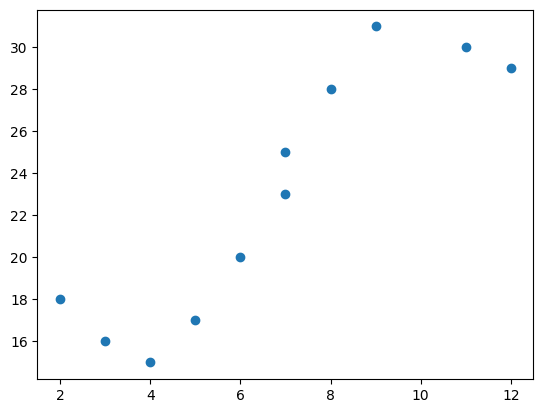

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#define predictor and response variables
x = np.array([2, 3, 4, 5, 6, 7, 7, 8, 9, 11, 12])
y = np.array([18, 16, 15, 17, 20, 23, 25, 28, 31, 30, 29])

#create scatterplot to visualize relationship between x and y
plt.scatter(x, y)

# Step 2 Polynomial Reression

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#specify degree of 3 for polynomial regression model
#include bias=False means don't force y-intercept to equal zero
poly = PolynomialFeatures(degree=3, include_bias=False)

#reshape data to work properly with sklearn
poly_features = poly.fit_transform(x.reshape(-1, 1))

#fit polynomial regression model
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)

#display model coefficients
print(poly_reg_model.intercept_, poly_reg_model.coef_)

33.626400375322774 [-11.83877127   2.25592957  -0.10889554]


# Step 3 Polynomial Regression

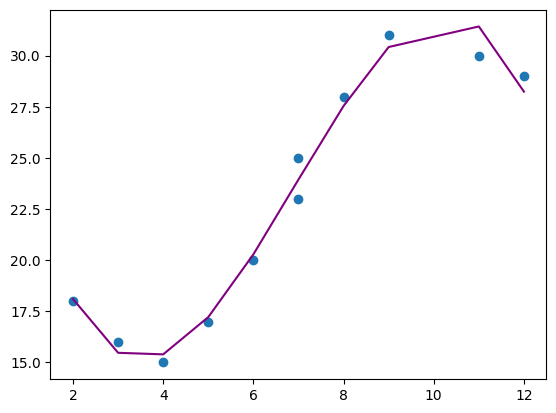

In [5]:
#use model to make predictions on response variable
y_predicted = poly_reg_model.predict(poly_features)

#create scatterplot of x vs. y
plt.scatter(x, y)

#add line to show fitted polynomial regression model
plt.plot(x, y_predicted, color='purple')